
## **The importance of exports in generating GDP growth.**

Recently, there has been a lot of uncertainty of how a trade war around the world may affect our economies. Especially in Central America where most countries have the U.S as a main trade partner in exports, while having China as main provider in imports. In this excersice our objective is to analyse the relation between GDP growth, with exports. Though we won´t make  use of an econometric model for now, we will make use of a graphical exploratory analisys with data from IMF recent World Economic Update 2025 as main source.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Entrada de datos
df=pd.read_csv("https://raw.githubusercontent.com/AaronGue001/ResearchingEconomics/refs/heads/main/WEOApr2025all.csv")

In [ ]:
df.head(5)

,WEO Country Code,ISO,WEO Subject Code,Country,Subject Descriptor,Subject Notes,Units,Scale,Country/Series-specific Notes,1980,...,2022,2023,2024,2025,2026,2027,2028,2029,2030,Estimates Start After
0,512,AFG,NGDP_R,Afghanistan,"Gross domestic product, constant prices",Expressed in billions of national currency uni...,National currency,Billions,Source: National Statistics Office Latest actu...,NaN,...,"1,032.71","1,056.12",NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024.0
1,512,AFG,NGDP_RPCH,Afghanistan,"Gross domestic product, constant prices",Annual percentages of constant price GDP are y...,Percent change,Units,"See notes for: Gross domestic product, consta...",NaN,...,-6.24,2.267,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024.0
2,512,AFG,NGDP,Afghanistan,"Gross domestic product, current prices",Expressed in billions of national currency uni...,National currency,Billions,Source: National Statistics Office Latest actu...,NaN,...,"1,283.44","1,350.91",NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024.0
3,512,AFG,NGDPD,Afghanistan,"Gross domestic product, current prices",Values are based upon GDP in national currency...,U.S. dollars,Billions,"See notes for: Gross domestic product, curren...",NaN,...,14.501,17.248,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024.0
4,512,AFG,PPPGDP,Afghanistan,"Gross domestic product, current prices",These data form the basis for the country weig...,Purchasing power parity; international dollars,Billions,"See notes for: Gross domestic product, curren...",NaN,...,86.149,91.272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024.0


In [ ]:
df=df.drop(columns="Estimates Start After")

In [ ]:
#Unpivot year columns to lines
df=pd.melt(df, id_vars=["WEO Country Code","ISO", "WEO Subject Code","Country","Subject Descriptor","Subject Notes","Units","Scale","Country/Series-specific Notes"], var_name="Year",value_name="Result")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 439824 entries, 0 to 439823
Data columns (total 11 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   WEO Country Code               439824 non-null  int64 
 1   ISO                            439824 non-null  object
 2   WEO Subject Code               439824 non-null  object
 3   Country                        439824 non-null  object
 4   Subject Descriptor             439824 non-null  object
 5   Subject Notes                  439824 non-null  object
 6   Units                          439824 non-null  object
 7   Scale                          439824 non-null  object
 8   Country/Series-specific Notes  390048 non-null  object
 9   Year                           439824 non-null  object
 10  Result                         331196 non-null  object
dtypes: int64(1), object(10)
memory usage: 36.9+ MB


In [ ]:
#Cleaning unnecesary Results line
df["Result"]=df["Result"].astype(str)\
                        .str.replace(",","", regex=True)\
                         .str.replace("--","", regex=True)\
                         .str.replace(" ","", regex=True)
df["Result"]=df["Result"].replace("",np.nan)

In [ ]:
df=df.dropna(subset=["Result"])

In [ ]:
df["Result"]=df["Result"].astype(float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 438618 entries, 0 to 439823
Data columns (total 11 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   WEO Country Code               438618 non-null  int64  
 1   ISO                            438618 non-null  object 
 2   WEO Subject Code               438618 non-null  object 
 3   Country                        438618 non-null  object 
 4   Subject Descriptor             438618 non-null  object 
 5   Subject Notes                  438618 non-null  object 
 6   Units                          438618 non-null  object 
 7   Scale                          438618 non-null  object 
 8   Country/Series-specific Notes  388842 non-null  object 
 9   Year                           438618 non-null  object 
 10  Result                         329990 non-null  float64
dtypes: float64(1), int64(1), object(9)
memory usage: 40.2+ MB


# **LATAM Macroeconomic GDP Growth: Heat Map**

In [ ]:
#We build a subset extracting the sample data we will use


selected_economies=["Guatemala","El Salvador","Honduras","Nicaragua","Costa Rica","Panama", "Mexico","Colombia","Ecuador","Venezuela","Brasil","Peru","Chile","Argentina","Uruguay","Paraguay"]
Indicator=["NGDP_RPCH"]

filter=df[df["Country"].isin(selected_economies)]
filter=filter[filter["WEO Subject Code"].isin(Indicator)]


In [ ]:
filter.head()

,WEO Country Code,ISO,WEO Subject Code,Country,Subject Descriptor,Subject Notes,Units,Scale,Country/Series-specific Notes,Year,Result
265,213,ARG,NGDP_RPCH,Argentina,"Gross domestic product, constant prices",Annual percentages of constant price GDP are y...,Percent change,Units,"See notes for: Gross domestic product, consta...",1980,0.700
1541,228,CHL,NGDP_RPCH,Chile,"Gross domestic product, constant prices",Annual percentages of constant price GDP are y...,Percent change,Units,"See notes for: Gross domestic product, consta...",1980,7.945
1629,233,COL,NGDP_RPCH,Colombia,"Gross domestic product, constant prices",Annual percentages of constant price GDP are y...,Percent change,Units,"See notes for: Gross domestic product, consta...",1980,4.429
1805,238,CRI,NGDP_RPCH,Costa Rica,"Gross domestic product, constant prices",Annual percentages of constant price GDP are y...,Percent change,Units,"See notes for: Gross domestic product, consta...",1980,0.752
2201,248,ECU,NGDP_RPCH,Ecuador,"Gross domestic product, constant prices",Annual percentages of constant price GDP are y...,Percent change,Units,"See notes for: Gross domestic product, consta...",1980,4.900


In [ ]:
Sel_econ_df=filter.pivot(index="Country",columns="Year", values="Result")

In [ ]:
Sel_econ_df.head(16)

Year,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030
Country,,,,,,,,,,,,,,,,,,,,,
Argentina,0.700,-5.744,-3.149,3.733,2.000,-6.951,7.146,2.529,-1.957,-7.007,...,10.442,5.270,-1.611,-1.719,5.502,4.520,3.960,3.240,3.129,2.973
Chile,7.945,6.212,-13.588,-2.802,5.886,1.968,5.596,6.581,7.288,10.605,...,11.315,2.154,0.521,2.644,2.032,2.182,2.258,2.315,2.305,2.232
Colombia,4.429,2.277,0.948,1.574,3.351,3.107,5.824,5.369,4.064,3.414,...,10.801,7.328,0.712,1.744,2.415,2.625,2.760,2.760,2.760,2.760
Costa Rica,0.752,-2.260,-7.285,2.859,8.028,0.722,5.536,4.765,3.432,5.666,...,7.936,4.551,5.112,4.321,3.443,3.434,3.536,3.529,3.509,3.500
Ecuador,4.900,3.900,1.200,-2.800,4.200,4.400,3.094,-5.972,10.486,0.285,...,9.422,5.868,1.988,-1.959,1.727,2.117,2.295,2.498,2.524,2.482
El Salvador,-8.625,-5.725,-6.306,1.535,1.337,0.616,0.190,2.513,1.878,0.962,...,11.910,2.797,3.511,2.600,2.479,2.515,3.035,3.114,2.754,2.754
Guatemala,3.700,0.644,-3.542,-2.528,0.510,-0.600,0.100,3.579,3.892,3.943,...,8.033,4.200,3.527,3.689,4.100,3.800,3.800,3.700,3.800,3.800
Honduras,0.599,-1.222,-2.075,0.906,6.327,5.626,5.331,6.638,1.746,2.728,...,12.565,4.144,3.583,3.600,3.300,3.400,3.700,3.800,3.800,3.800
Mexico,9.482,9.586,-0.050,-4.624,3.513,1.919,-3.930,2.063,1.218,3.625,...,6.048,3.711,3.295,1.454,-0.260,1.370,2.143,2.203,2.175,2.104


In [ ]:
Sel_econ_df=Sel_econ_df.drop(columns=["1980","1981","1982","1983","1984","1985","1986","1987","1988","1989","2028","2029","2030"])

In [ ]:
Sel_econ_df = Sel_econ_df.astype(float)

Text(70.72222222222221, 0.5, 'Country')

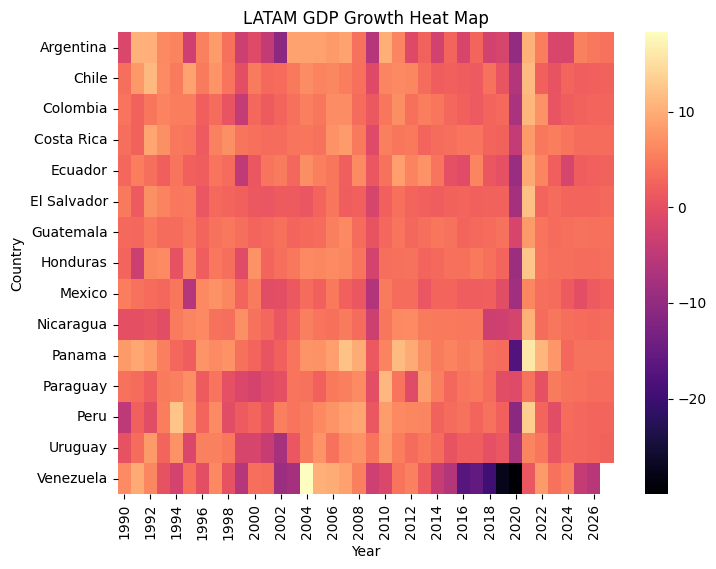

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(Sel_econ_df, annot=False, cmap="magma")
plt.title("LATAM GDP Growth Heat Map")
plt.xlabel("Year")
plt.ylabel("Country")

# **LATAM Macroeconomic Exports Growth: Heat Map**

In [ ]:
Indicator3=["TXG_RPCH"]

filter3=df[df["Country"].isin(selected_economies)]
filter3=filter3[filter3["WEO Subject Code"].isin(Indicator3)]


In [ ]:
filter3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 765 entries, 287 to 439583
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   WEO Country Code               765 non-null    int64  
 1   ISO                            765 non-null    object 
 2   WEO Subject Code               765 non-null    object 
 3   Country                        765 non-null    object 
 4   Subject Descriptor             765 non-null    object 
 5   Subject Notes                  765 non-null    object 
 6   Units                          765 non-null    object 
 7   Scale                          765 non-null    object 
 8   Country/Series-specific Notes  765 non-null    object 
 9   Year                           765 non-null    object 
 10  Result                         725 non-null    float64
dtypes: float64(1), int64(1), object(9)
memory usage: 71.7+ KB


In [ ]:
Sel_econ_df_ex=filter3.pivot(index="Country",columns="Year", values="Result")
Sel_econ_df_ex=Sel_econ_df_ex.drop(columns=["1980","1981","1982","1983","1984","1985","1986","1987","1988","1989","2028","2029","2030"])
Sel_econ_df_ex = Sel_econ_df_ex.astype(float)
Sel_econ_df_ex.head(16)

Year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027
Country,,,,,,,,,,,,,,,,,,,,,
Argentina,4.835,-0.251,5.175,2.385,17.375,25.559,6.395,15.064,12.774,-2.209,...,-0.653,12.364,-12.841,12.674,-2.168,-16.580,27.835,4.860,4.724,4.639
Chile,5.700,9.600,13.900,3.700,9.800,11.500,11.995,11.026,7.820,5.841,...,5.896,-2.241,2.876,-1.056,-1.747,-1.131,5.273,3.534,2.927,2.646
Colombia,18.623,10.657,7.981,11.825,15.551,-5.448,-1.091,5.596,6.698,1.172,...,-6.555,0.345,-6.003,0.739,7.185,2.157,-1.292,3.179,2.180,2.708
Costa Rica,2.043,9.376,16.077,6.754,3.469,13.587,5.589,9.088,28.955,23.412,...,3.687,0.678,0.093,20.321,6.782,12.386,8.033,4.212,5.598,5.351
Ecuador,4.189,14.298,6.342,13.371,13.783,11.357,-0.783,4.546,-5.339,1.295,...,-0.146,7.596,6.108,7.050,2.774,5.910,6.489,-1.454,4.952,4.298
El Salvador,56.947,-12.212,20.974,20.939,-6.164,28.520,-6.080,27.637,-4.763,-1.839,...,-1.651,1.418,-17.392,24.660,-2.350,-4.863,-0.513,2.187,2.437,3.805
Guatemala,13.097,7.508,8.455,7.804,-1.493,18.925,6.836,14.001,25.402,3.891,...,-0.370,0.232,-7.526,10.208,7.520,-2.522,3.050,4.422,6.330,6.717
Honduras,-3.259,-4.967,1.990,23.131,8.861,8.300,15.310,3.134,6.246,-16.260,...,-4.726,0.061,-3.297,10.678,-2.666,2.622,-4.873,6.447,4.947,5.610
Mexico,8.228,6.560,6.400,16.698,10.415,26.000,18.403,9.626,8.327,7.556,...,6.972,1.175,-4.878,5.537,8.308,-7.093,2.819,-2.017,0.747,3.323


Text(70.72222222222221, 0.5, 'Country')

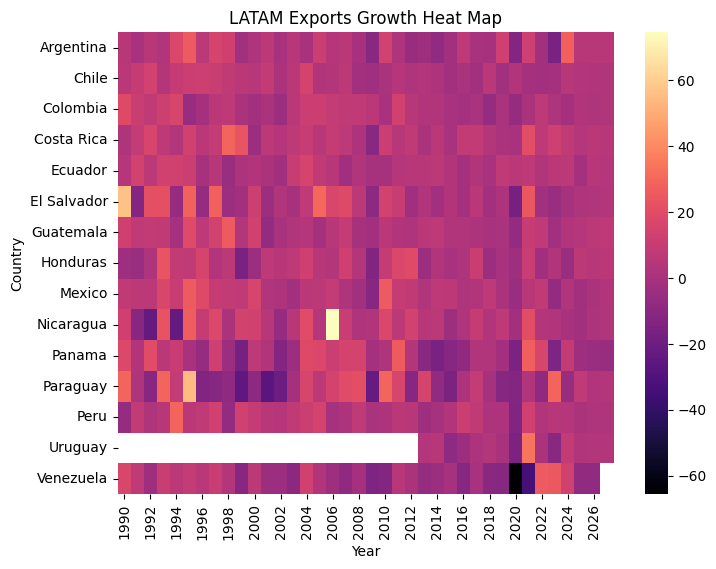

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(Sel_econ_df_ex, annot=False, cmap="magma")
plt.title("LATAM Exports Growth Heat Map")
plt.xlabel("Year")
plt.ylabel("Country")

# **LATAM Anual GDP and Exports percent change Scatter Map**

In [ ]:
Indicator2=["NGDP_RPCH","TXG_RPCH","NGDPD"]
ISO=["GTM","SLV","HND","NIC","CRI","PAN","MEX","COL","ECU","VEN","BRA","PER","CHL","ARG","URY","PRY"]
Year=["2024"]
filter2=df[df["ISO"].isin(ISO)]
filter2=filter2[filter2["WEO Subject Code"].isin(Indicator2)]
filter2=filter2[filter2["Year"].isin(Year)]
Sel_econ_df2=filter2.pivot(index="ISO",columns="WEO Subject Code", values="Result")


In [ ]:
Sel_econ_df2

WEO Subject Code,NGDPD,NGDP_RPCH,TXG_RPCH
ISO,,,
ARG,632.145,-1.719,27.835
BRA,2171.340,3.396,-1.153
CHL,330.210,2.644,5.273
COL,418.542,1.744,-1.292
CRI,95.365,4.321,8.033
ECU,121.728,-1.959,6.489
GTM,112.575,3.689,3.050
HND,36.965,3.600,-4.873
MEX,1852.720,1.454,2.819


<ipython-input-125-52b9f3e15980>:13: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



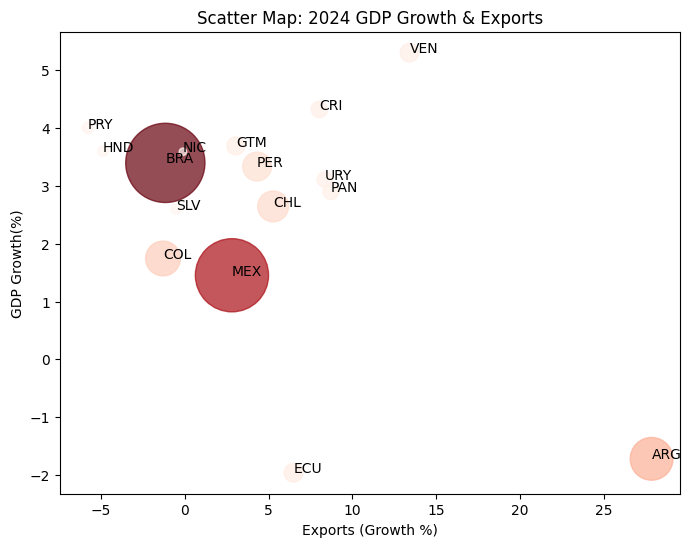

In [ ]:
#'TXG_RPCH' "GDP Growth(%)"
plt.figure(figsize=(8, 6))
plt.scatter(Sel_econ_df2['TXG_RPCH'], Sel_econ_df2['NGDP_RPCH'], s=[g*1.5 for g in Sel_econ_df2["NGDPD"]], c=Sel_econ_df2["NGDPD"], cmap="Reds", alpha=0.7, edgecolors=None)
plt.grid(False)
plt.title("Scatter Map: 2024 GDP Growth & Exports")
plt.xlabel("Exports (Growth %)")
plt.ylabel("GDP Growth(%)")



countries3 = Sel_econ_df2.index
for i in range(len(countries3)):
    plt.annotate(countries3[i], (Sel_econ_df2['TXG_RPCH'][i], Sel_econ_df2['NGDP_RPCH'][i]))



In [ ]:
countries3

Index(['ARG', 'BRA', 'CHL', 'COL', 'CRI', 'ECU', 'GTM', 'HND', 'MEX', 'NIC',
       'PAN', 'PER', 'PRY', 'SLV', 'URY', 'VEN'],
      dtype='object', name='ISO')

In [ ]:
Sel_econ_df2 = Sel_econ_df2.rename(columns={
    'NGDP_RPCH': 'GDP Growth (%)',
    'NGDPD': 'GDP Millions US dollars',
    'TXG_RPCH': 'Export Growth (%)'
})

In [ ]:
import plotly.express as px


fig = px.scatter(
    Sel_econ_df2,
    x='Export Growth (%)',  # Exports growth (%)
    y='GDP Growth (%)',  # GDP growth (%)
    size='GDP Millions US dollars',  # Bubble size based on Nominal GDP
    color="GDP Millions US dollars",
    hover_name=Sel_econ_df2.index,  # Display country names when hovering
    title="Scatter Map: 2024 GDP Growth & Exports"
)

# Customizing axis labels
fig.update_layout(
    xaxis_title="Exports (Growth %)",
    yaxis_title="GDP Growth (%)"
)

# Show the plot
fig.show()

# **Annual GDP Growth and Exports Growth Central American Countries**

In [ ]:
Indicator5=["NGDP_RPCH","TXG_RPCH"]
Country5_slv=["El Salvador"]
filter5=df[df["Country"].isin(Country5_slv)]
filter5=filter5[filter5["WEO Subject Code"].isin(Indicator5)]
#filter5=filter5.drop(columns=["1980","1981","1982","1983","1984","1985","1986","1987","1988","1989","2028","2029","2030"])
#filter5=pd.melt(filter5, id_vars=["WEO Country Code","ISO", "WEO Subject Code","Country","Subject Descriptor","Subject Notes","Units","Scale","Country/Series-specific Notes"], var_name="Year",value_name="Result")
Sel_econ_df5=filter5.pivot(index="Year",columns="WEO Subject Code", values="Result")

In [ ]:
Sel_econ_df5

WEO Subject Code,NGDP_RPCH,TXG_RPCH
Year,,
1980,-8.625,-15.197
1981,-5.725,-21.860
1982,-6.306,-14.705
1983,1.535,12.909
1984,1.337,-11.144
1985,0.616,-6.582
1986,0.190,-16.000
1987,2.513,1.700
1988,1.878,-5.457


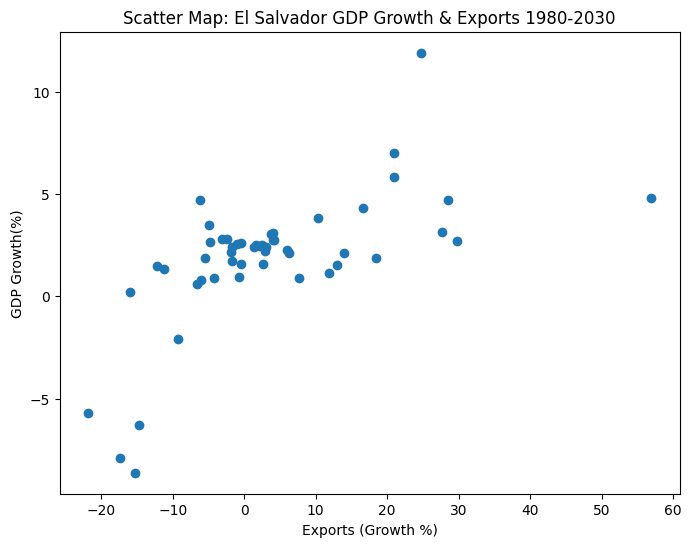

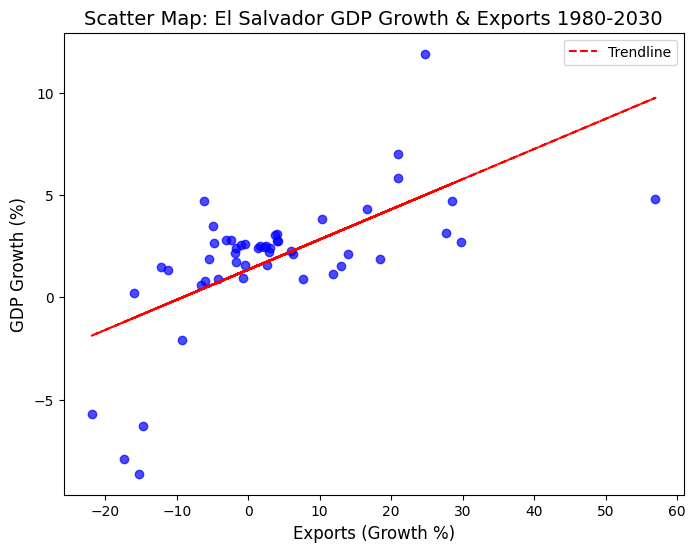

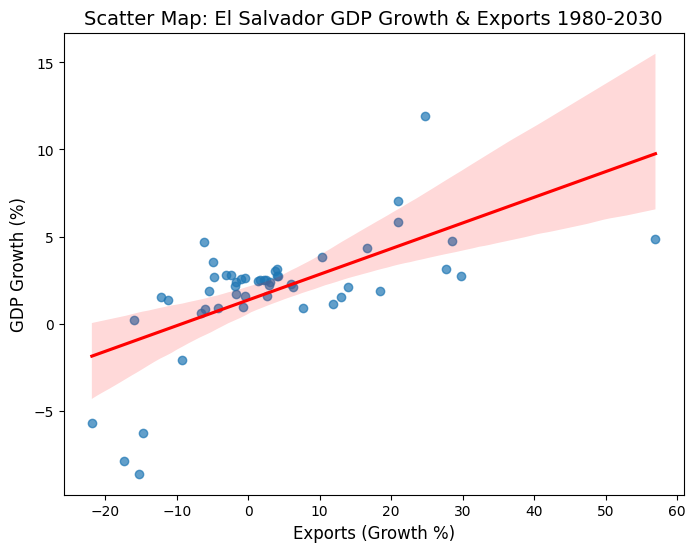

In [ ]:
#'TXG_RPCH' "GDP Growth(%)"
plt.figure(figsize=(8, 6))
plt.scatter(Sel_econ_df5['TXG_RPCH'], Sel_econ_df5['NGDP_RPCH'])
plt.grid(False)
plt.title("Scatter Map: El Salvador GDP Growth & Exports 1980-2030")
plt.xlabel("Exports (Growth %)")
plt.ylabel("GDP Growth(%)")

# Calculate trendline
m, b = np.polyfit(Sel_econ_df5['TXG_RPCH'], Sel_econ_df5['NGDP_RPCH'], 1)
plt.figure(figsize=(8, 6))
plt.scatter(Sel_econ_df5['TXG_RPCH'], Sel_econ_df5['NGDP_RPCH'], color='blue', alpha=0.7)
plt.plot(Sel_econ_df5['TXG_RPCH'], m * Sel_econ_df5['TXG_RPCH'] + b, color='red', linestyle='--', label='Trendline')
plt.grid(False)
plt.title("Scatter Map: El Salvador GDP Growth & Exports 1980-2030", fontsize=14)
plt.xlabel("Exports (Growth %)", fontsize=12)
plt.ylabel("GDP Growth (%)", fontsize=12)
plt.legend()
plt.show()



plt.figure(figsize=(8, 6))
sns.regplot(x='TXG_RPCH', y='NGDP_RPCH', data=Sel_econ_df5, scatter_kws={'alpha':0.7}, line_kws={'color':'red'})
plt.title("Scatter Map: El Salvador GDP Growth & Exports 1980-2030", fontsize=14)
plt.xlabel("Exports (Growth %)", fontsize=12)
plt.ylabel("GDP Growth (%)", fontsize=12)
plt.show()



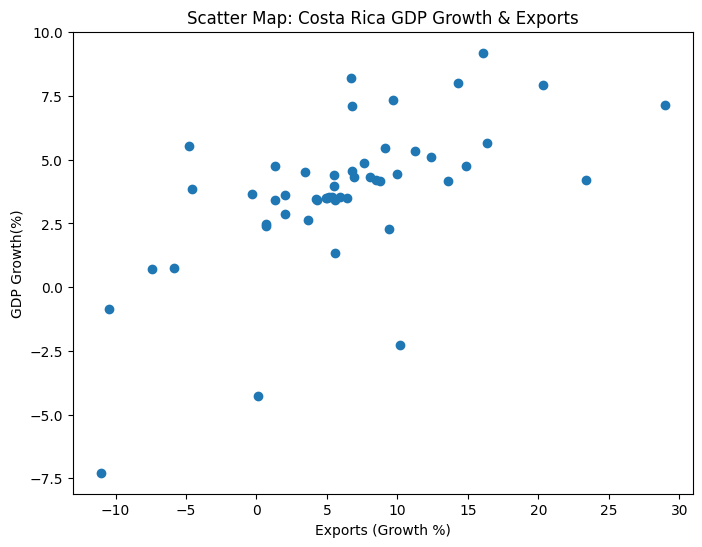

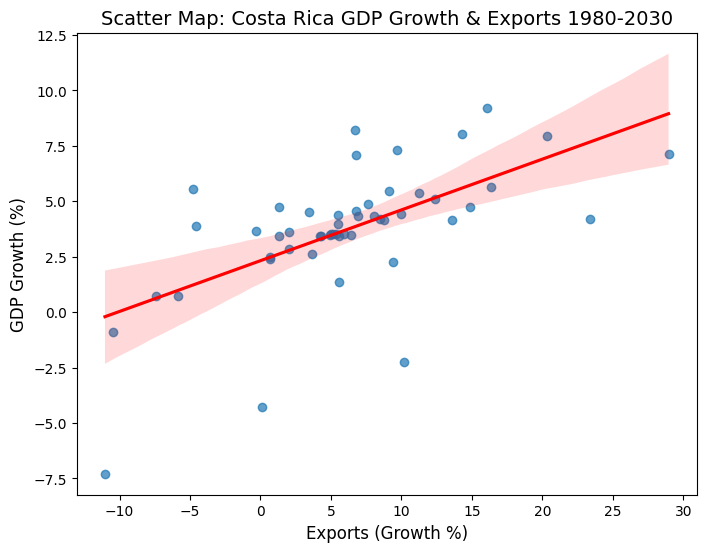

In [ ]:
Indicator5=["NGDP_RPCH","TXG_RPCH"]
Country5_CRI=["Costa Rica"]
filter6=df[df["Country"].isin(Country5_CRI)]
filter6=filter6[filter6["WEO Subject Code"].isin(Indicator5)]
Sel_econ_df6=filter6.pivot(index="Year",columns="WEO Subject Code", values="Result")

plt.figure(figsize=(8, 6))
plt.scatter(Sel_econ_df6['TXG_RPCH'], Sel_econ_df6['NGDP_RPCH'])
plt.grid(False)
plt.title("Scatter Map: Costa Rica GDP Growth & Exports")
plt.xlabel("Exports (Growth %)")
plt.ylabel("GDP Growth(%)")

plt.figure(figsize=(8, 6))
sns.regplot(x='TXG_RPCH', y='NGDP_RPCH', data=Sel_econ_df6, scatter_kws={'alpha':0.7}, line_kws={'color':'red'})
plt.title("Scatter Map: Costa Rica GDP Growth & Exports 1980-2030", fontsize=14)
plt.xlabel("Exports (Growth %)", fontsize=12)
plt.ylabel("GDP Growth (%)", fontsize=12)
plt.show()


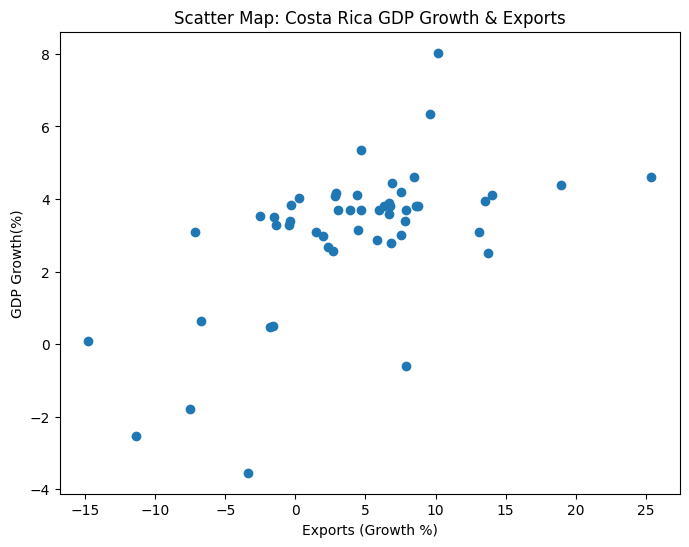

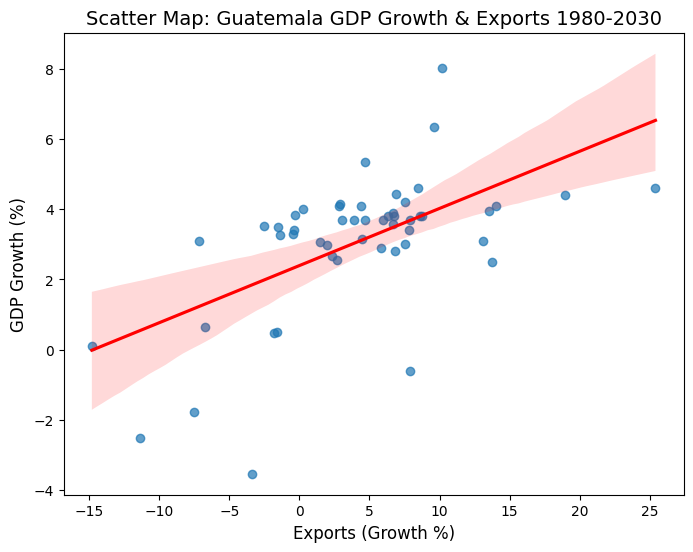

In [ ]:
Indicator5=["NGDP_RPCH","TXG_RPCH"]
Country5_GTM=["Guatemala"]
filter7=df[df["Country"].isin(Country5_GTM)]
filter7=filter7[filter7["WEO Subject Code"].isin(Indicator5)]
Sel_econ_df7=filter7.pivot(index="Year",columns="WEO Subject Code", values="Result")

plt.figure(figsize=(8, 6))
plt.scatter(Sel_econ_df7['TXG_RPCH'], Sel_econ_df7['NGDP_RPCH'])
plt.grid(False)
plt.title("Scatter Map: Costa Rica GDP Growth & Exports")
plt.xlabel("Exports (Growth %)")
plt.ylabel("GDP Growth(%)")

plt.figure(figsize=(8, 6))
sns.regplot(x='TXG_RPCH', y='NGDP_RPCH', data=Sel_econ_df7, scatter_kws={'alpha':0.7}, line_kws={'color':'red'})
plt.title("Scatter Map: Guatemala GDP Growth & Exports 1980-2030", fontsize=14)
plt.xlabel("Exports (Growth %)", fontsize=12)
plt.ylabel("GDP Growth (%)", fontsize=12)
plt.show()

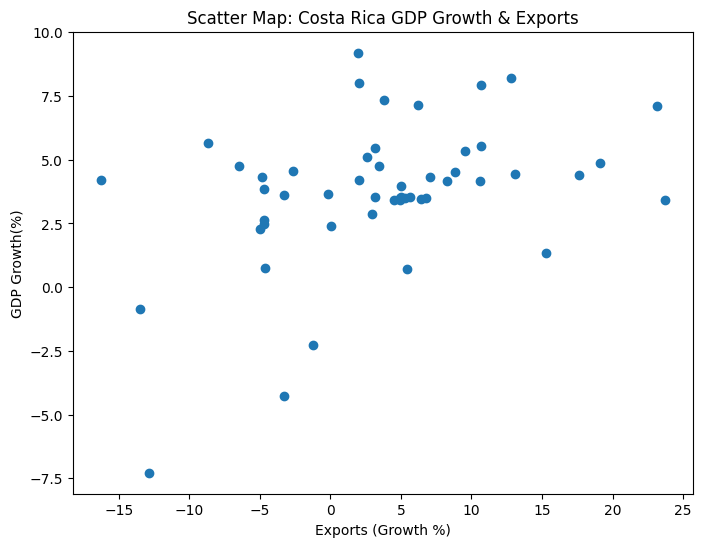

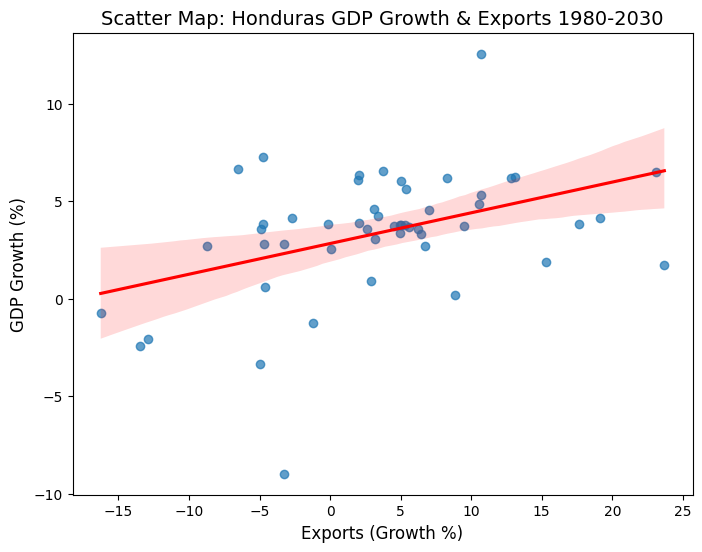

In [ ]:
Indicator5=["NGDP_RPCH","TXG_RPCH"]
Country5_HND=["Honduras"]
filter8=df[df["Country"].isin(Country5_HND)]
filter8=filter8[filter8["WEO Subject Code"].isin(Indicator5)]
Sel_econ_df8=filter8.pivot(index="Year",columns="WEO Subject Code", values="Result")

plt.figure(figsize=(8, 6))
plt.scatter(Sel_econ_df8['TXG_RPCH'], Sel_econ_df6['NGDP_RPCH'])
plt.grid(False)
plt.title("Scatter Map: Costa Rica GDP Growth & Exports")
plt.xlabel("Exports (Growth %)")
plt.ylabel("GDP Growth(%)")

plt.figure(figsize=(8, 6))
sns.regplot(x='TXG_RPCH', y='NGDP_RPCH', data=Sel_econ_df8, scatter_kws={'alpha':0.7}, line_kws={'color':'red'})
plt.title("Scatter Map: Honduras GDP Growth & Exports 1980-2030", fontsize=14)
plt.xlabel("Exports (Growth %)", fontsize=12)
plt.ylabel("GDP Growth (%)", fontsize=12)
plt.show()